## District Shapefile Attributes

### This code reads, analyzes, and plots a shapefile.

- Shapefiles are vector-based regional boundaries for a region. They require GeoPandas library, which is similar to Pandas.
- *NOTE: GeoPandas and Rasterio are not compatibile in the most recent version of Python.*
   
***Recommended Python version: 3.9***

Zimbabwe Boundaries - district (adm2). (Humdata, 2023)

Source: https://data.humdata.org/dataset/cod-ab-zwe

In [1]:
import geopandas as gpd

# Load the provincial shapefile
district_shapefile = gpd.read_file("zwe_admbnda_adm2_zimstat_ocha_20180911.shp")

# Print the first five rows of the attribute table
district_shapefile.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,6.243144,1.111672,Beitbridge,ZW1601,None,None,None,Matabeleland South,ZW16,Zimbabwe,ZW,2018-08-31,2018-09-11,None,"POLYGON ((29.90621 -21.26976, 29.91866 -21.276..."
1,0.391538,0.007823,Beitbridge Urban,ZW1622,None,None,None,Matabeleland South,ZW16,Zimbabwe,ZW,2018-08-31,2018-09-11,None,"POLYGON ((29.98811 -22.15274, 30.02215 -22.159..."
2,3.274864,0.447512,Bikita,ZW1801,None,None,None,Masvingo,ZW18,Zimbabwe,ZW,2018-08-31,2018-09-11,None,"POLYGON ((31.97352 -19.82110, 31.97389 -19.825..."
3,3.177016,0.190533,Bindura,ZW1201,None,None,None,Mashonaland Central,ZW12,Zimbabwe,ZW,2018-08-31,2018-09-11,None,"POLYGON ((31.29627 -16.82632, 31.37156 -16.836..."
4,0.213425,0.001697,Bindura Urban,ZW1221,None,None,None,Mashonaland Central,ZW12,Zimbabwe,ZW,2018-08-31,2018-09-11,None,"POLYGON ((31.36502 -17.31971, 31.36601 -17.323..."


Explore attributes and metadata.

In [2]:
# Constructing the metadata summary
metadata_summary = {
    "Total Features": len(district_shapefile),
    "Geometry Types": district_shapefile.geom_type.unique(),
    "Coordinate Reference System (CRS)": district_shapefile.crs,
    "Extent of Geometries": district_shapefile.total_bounds,
    "Attribute Columns": district_shapefile.columns.tolist(),
    "Sample Rows": district_shapefile.head(20),
    "Data Types of Columns": district_shapefile.dtypes,
    "Missing Data by Column": district_shapefile.isnull().sum()
}

# To display the metadata summary, iterate through the dictionary
for key, value in metadata_summary.items():
    print(f"{key}:\n{value}\n")


Total Features:
91

Geometry Types:
['Polygon']

Coordinate Reference System (CRS):
epsg:4326

Extent of Geometries:
[ 25.23759718 -22.42104926  33.06717812 -15.60714303]

Attribute Columns:
['Shape_Leng', 'Shape_Area', 'ADM2_EN', 'ADM2_PCODE', 'ADM2_REF', 'ADM2ALT1EN', 'ADM2ALT2EN', 'ADM1_EN', 'ADM1_PCODE', 'ADM0_EN', 'ADM0_PCODE', 'date', 'validOn', 'validTo', 'geometry']

Sample Rows:
    Shape_Leng  Shape_Area                ADM2_EN ADM2_PCODE ADM2_REF  \
0     6.243144    1.111672             Beitbridge     ZW1601     None   
1     0.391538    0.007823       Beitbridge Urban     ZW1622     None   
2     3.274864    0.447512                 Bikita     ZW1801     None   
3     3.177016    0.190533                Bindura     ZW1201     None   
4     0.213425    0.001697          Bindura Urban     ZW1221     None   
5     6.209920    1.136713                  Binga     ZW1501     None   
6     4.550058    0.523205                   Bubi     ZW1502     None   
7     4.060916    0.46088

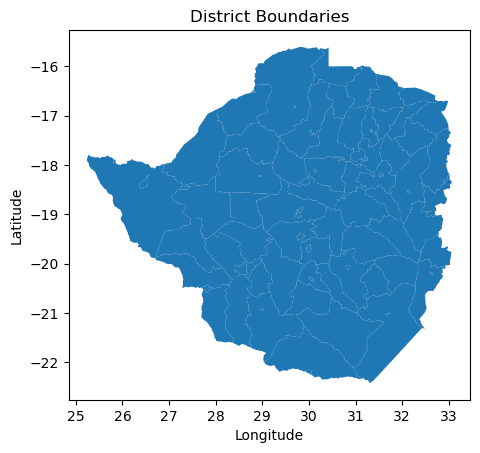

In [4]:
import matplotlib.pyplot as plt

# Plot the districts
district_shapefile.plot()
plt.title("District Boundaries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
